# Treue Technologies (Internship - Data Science) [Ansh Pandey]

## Task (2) : Customer Segmentation for Online Retail (ML Model)

### Objective = Analyze customer data from an online retail platform to segment customers based on their purchasing behavior, preferences, and demographics. The goal is to gain insights into distinct customer segments and tailor marketing strategies to target each segment effectively.

#### i) Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns


#### ii) Data Loading and Exploration

In [2]:
data = pd.read_excel("C:\\Users\\asus\\Desktop\\Data Science or Analytics_Ansh\\Customer Segmentation for Online Retail\Online Retail.xlsx")

In [3]:
print(data)

       InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  UnitPrice  CustomerID         Country  
0      

In [4]:
data.head(12)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


In [5]:
data.info

<bound method DataFrame.info of        InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  UnitPrice  Cust

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [7]:

data.shape

(541909, 8)

In [8]:
data.size

4335272

In [9]:
data.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

#### iii) Data Preprocessing

In [10]:
# Creating a Seprating data-frame G ()
G = data.iloc[:,[3,5]].values

In [11]:
G

array([[6.  , 2.55],
       [6.  , 3.39],
       [8.  , 2.75],
       ...,
       [4.  , 4.15],
       [4.  , 4.15],
       [3.  , 4.95]])

In [12]:
data = data.dropna(subset=['CustomerID'])

# creating a new feature : Total Purchase Amount
data['TotalPurchase'] = data['Quantity'] * data['UnitPrice']


C:\Users\asus\AppData\Local\Temp\ipykernel_13132\1292410216.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['TotalPurchase'] = data['Quantity'] * data['UnitPrice']


#### iv) Feature Selection

In [13]:
features = data.groupby('CustomerID')['TotalPurchase'].sum().reset_index()
features.columns = ['CustomerID', 'Totalpurchase']


#### v) Standardize Features

In [14]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features[['Totalpurchase']])


#### vi) Determine the Number of Clusters (k)

In [15]:
from sklearn.cluster import KMeans
inertia = []

In [16]:
from sklearn.cluster import KMeans
wcss = []

In [17]:
for i in range(1,11):
    kmeans = KMeans(n_clusters= i, init= 'k-means++', random_state=0)
    kmeans.fit(G)
    wcss.append(kmeans.inertia_)

C:\Users\asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_

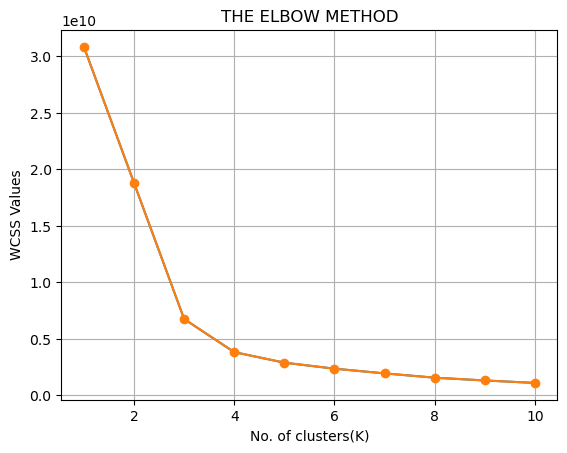

In [21]:
plt.plot(range(1,11), wcss)
plt.plot(range(1, 11), wcss, marker='o', linestyle='-')
plt.title('THE ELBOW METHOD')
plt.xlabel('No. of clusters(K)')
plt.ylabel('WCSS Values')
plt.grid()
plt.show()

C:\Users\asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_

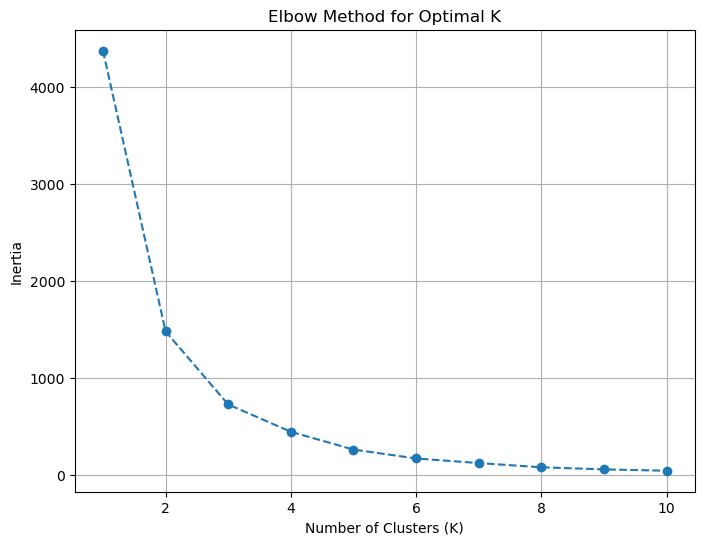

In [22]:
# Uses the Elbow Method to find the optimal number of clusters
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Ploting the Elbow Method
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.grid()
plt.show()



#### vii) Perform K-Means Clustering

In [23]:
from sklearn.cluster import KMeans

#Explicitly set n_init to suppress the warning 
kmeans = KMeans(n_clusters = 5, n_init = 10)

In [26]:
# Chooses the optimal k and perform clustering
k_optimal = 3 
kmeans = KMeans(n_clusters=k_optimal, random_state=0)
features['Cluster'] = kmeans.fit_predict(scaled_features)

C:\Users\asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [27]:
# Training model [using unsupervised learning algorithm (K-Means)]

kmeansmodel = KMeans(n_clusters = 3, init = 'k-means++', random_state = 0)

In [28]:
y_kmeans = kmeansmodel.fit_predict(G)

C:\Users\asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


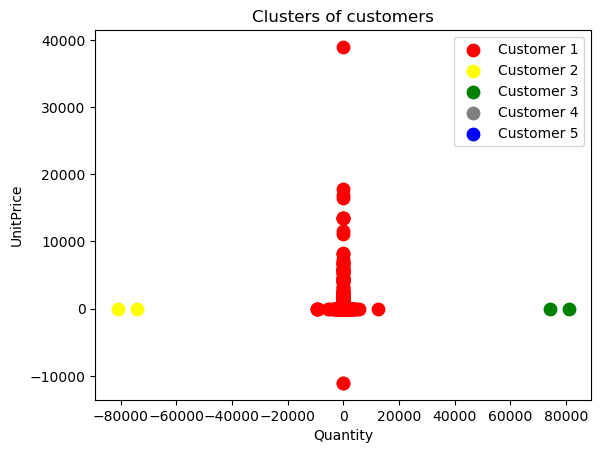

In [29]:
plt.scatter(G[y_kmeans == 0,0], G[y_kmeans == 0,1], c = 'Red', s = 80,  label= 'Customer 1')
plt.scatter(G[y_kmeans == 1,0], G[y_kmeans == 1,1], c = 'Yellow', s = 80,  label= 'Customer 2')
plt.scatter(G[y_kmeans == 2,0], G[y_kmeans == 2,1], c = 'Green', s = 80,  label= 'Customer 3')
plt.scatter(G[y_kmeans == 3,0], G[y_kmeans == 3,1], c = 'Gray', s = 80,  label= 'Customer 4')
plt.scatter(G[y_kmeans == 4,0], G[y_kmeans == 4,1], c = 'Blue', s = 80,  label= 'Customer 5')
plt.title('Clusters of customers')
plt.xlabel('Quantity')
plt.ylabel('UnitPrice')
plt.legend()
plt.show()

#### viii) Analyzes Customer Segments

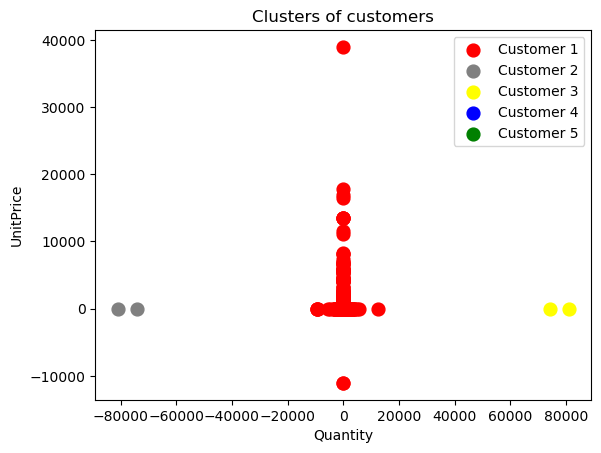

In [30]:
plt.scatter(G[y_kmeans == 0,0], G[y_kmeans == 0,1], s=85, c = 'Red', label ='Customer 1')
plt.scatter(G[y_kmeans == 1,0], G[y_kmeans == 1,1], s=85, c = 'Grey', label ='Customer 2')
plt.scatter(G[y_kmeans == 2,0], G[y_kmeans == 2,1], s=85, c = 'Yellow', label ='Customer 3')
plt.scatter(G[y_kmeans == 3,0], G[y_kmeans == 3,1], s=85, c = 'Blue', label ='Customer 4')
plt.scatter(G[y_kmeans == 4,0], G[y_kmeans == 4,1], s=85, c = 'Green', label ='Customer 5')
plt.title('Clusters of customers')
plt.xlabel('Quantity')
plt.ylabel('UnitPrice')
plt.legend()
plt.show()

## Conclusion : 

###  In conclusion, the development and implementation of a machine learning model for customer segmentation in the context of an online retail platform have proven to be a valuable asset for understanding and engaging with customers more effectively. Through this project, I aimed to analyze customer data, dissect their purchasing behavior, preferences, and demographics to create distinct customer segments. The primary goal was to uncover actionable insights that would enable us to tailor marketing strategies to each segment, thereby enhancing customer engagement and driving business growth.